In [1]:
# run for the first time only
install.packages("ncdf4")
install.packages("raster")

Installing package into 'C:/Users/35953/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ncdf4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35953\AppData\Local\Temp\RtmpYjqqOh\downloaded_packages


Installing package into 'C:/Users/35953/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'Rcpp', 'terra'




package 'Rcpp' successfully unpacked and MD5 sums checked
package 'terra' successfully unpacked and MD5 sums checked
package 'raster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35953\AppData\Local\Temp\RtmpYjqqOh\downloaded_packages


In [2]:
# load libraries
library(ncdf4)
library(raster)

Warning message:
"package 'ncdf4' was built under R version 4.2.3"
Warning message:
"package 'raster' was built under R version 4.2.3"
Loading required package: sp



In [9]:
# Specify the path to the NetCDF file (this is where the downloaded file is located)
file_path = "E:/ta_era5_china_2001_2010.nc"

# Open the NetCDF file
nc = nc_open(file_path)

# Display the names of variables contained in the file
print(names(nc$var))

# Select the variable to plot (assuming the variable name is "t2m", please modify according to the actual file content)
var_name = "t2m"

# read in the nc file
data = ncvar_get(nc, var_name)


[1] "t2m"


class      : RasterStack 
dimensions : 145, 257, 37265, 480  (nrow, ncol, ncell, nlayers)
resolution : 0.25, 0.25  (x, y)
extent     : 71.875, 136.125, 17.875, 54.125  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : X1981.01.01, X1981.02.01, X1981.03.01, X1981.04.01, X1981.05.01, X1981.06.01, X1981.07.01, X1981.08.01, X1981.09.01, X1981.10.01, X1981.11.01, X1981.12.01, X1982.01.01, X1982.02.01, X1982.03.01, ... 
Date/time   : 1981-01-01 - 2020-12-01 (range)


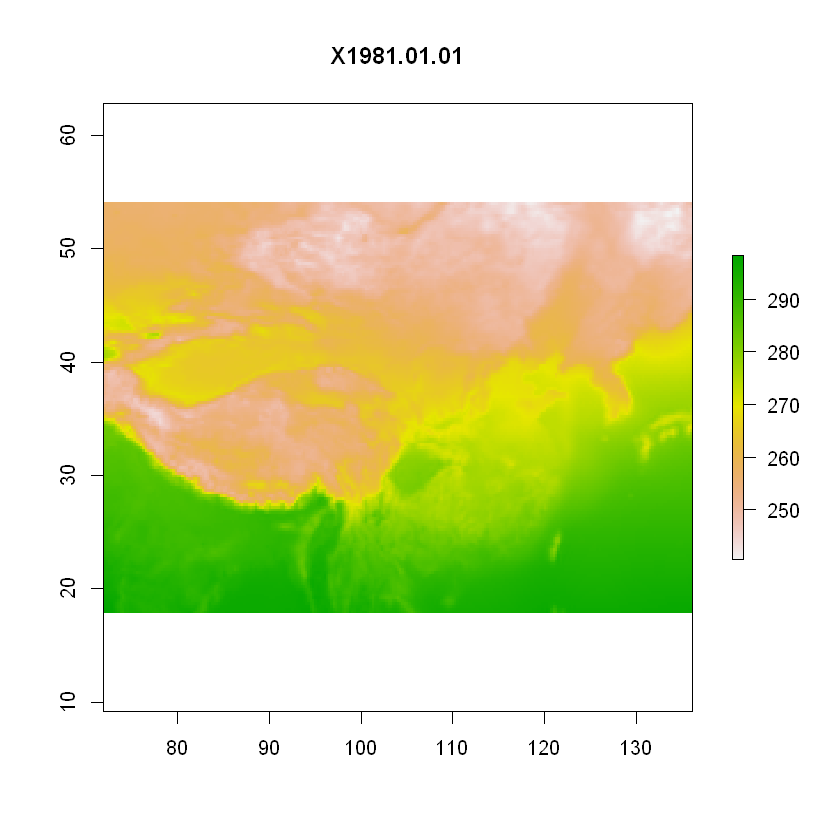

In [19]:
##### 01 Plotting spatial distribution for a month -------------
# Select the year to plot (assuming to plot data from January 1980, modify as needed)

file_path = "D:/temp_1980-1984_china_era5.nc"

# Open the NetCDF file
nc = nc_open(file_path)

# Load as a raster stack
input_nc = file_path
rstack = stack(input_nc, varname = names(nc$var) )

# print the content of the raster
rstack

# Plot the spatial distribution, taking the i-th month as an example
# If plotting the spatial distribution of multi-year averages, likewise add a loop to calculate the average for each grid point across years
i=1 
plot(raster(rstack,i), main=names(rstack)[i])


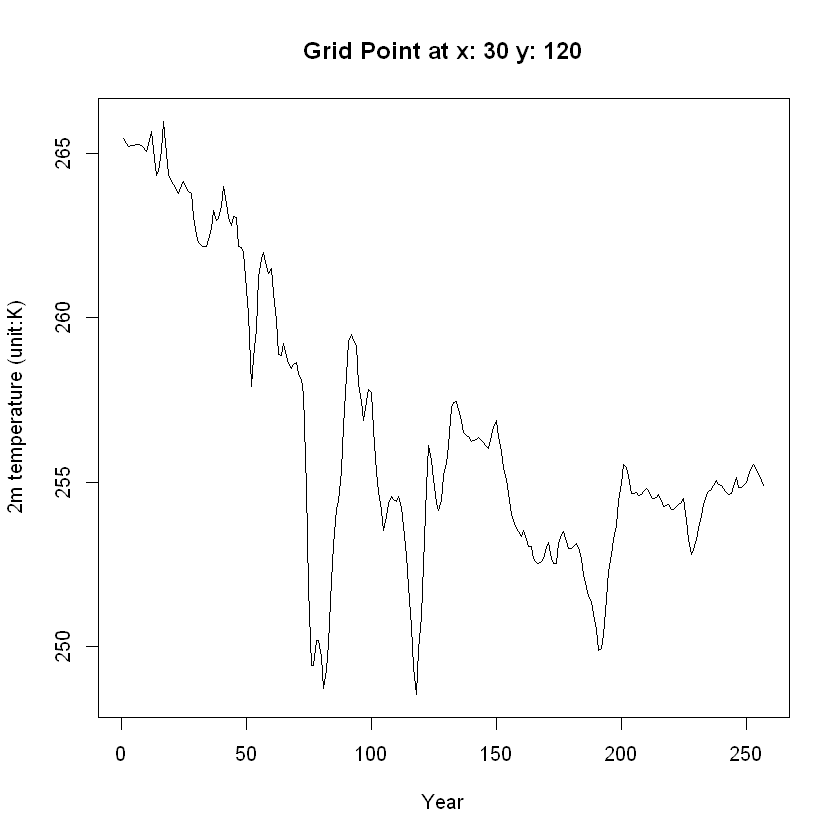

In [13]:
##### 02 Plotting annual variation graph -------------
# Select the grid point location to plot (assuming x is 30, y is 120, modify as needed)
# If calculating regional average, should add a loop to compute the average of all grid points annually
xx = 30
yy = 120

# Retrieve annual change data, units are kept as original from era5 data, e.g., temperature in Kelvin
datapoint = data[, xx, yy]

# Close the NetCDF file
nc_close(nc)

# Plot the annual variation for a specific grid point, parameter 'type' indicates line style, 'xlab' and 'ylab' are the names of the axes, 'main' is the title of the graph
plot(datapoint, type = "l", 
xlab = "Year", ylab = "2m temperature (unit:K)", 
main = paste("Grid Point at x:", xx, "y:", yy))

In [20]:
# Save a single object to a file
save(rstack, file="E:/ta_era5_china_2001_2010_readin.RData") #(~11kb, much more smaller than the original 8mb)
# Restore it under a different name
# my_data = readRDS("mtcars.rds")

In [21]:
# -------------------break-----------------

In [22]:
# play with the 'geodata' library
install.packages("geodata")

Installing package into 'C:/Users/35953/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'geodata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35953\AppData\Local\Temp\RtmpYjqqOh\downloaded_packages


In [23]:
library(geodata)

Warning message:
"package 'geodata' was built under R version 4.2.3"
Loading required package: terra

Warning message:
"package 'terra' was built under R version 4.2.3"
terra 1.7.71



In [ ]:
# if you don't know how to use a library:
help(geodata)

In [ ]:
cmp6 = cmip6_world("CNRM-CM6-1", "585", "2061-2070", 
                   var="tas", res=10, path=tempdir()) # download the data, 'path' is where you want to store it
cmp6
plot(raster(cmp6,1))